<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#bcbcbc;
           font-size:300%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="font-size:30px;text-align:center"> Bone Marrow Changes in Lumbar Vertebrae MRI Classification</p>
</div>


<p style="text-align:center;"><img src="https://www.ajronline.org/cms/10.2214/AJR.11.7005/asset/images/12_11_7005_01.jpeg" width="200" height="350">
    
    
    
    
    
The objective of this project is to build a deep-learning model that can accurately classify MRI images as either Normal or Abnormal. The model will be trained on a dataset of labeled MRI images and will learn to identify specific patterns and features associated with Bone Marrow Changes in Lumbar Vertebrae. For Bone Marrow Changes in Lumbar Vertebrae classification, Bone Marrow Changes in Lumbar Vertebrae were divided into two main groups: Normal, and Abnormal, depending on the area that is involved. Each of these classes is subsequently divided into sub-groups. To introduce a transfer learning model that can improve the classification of Bone Marrow Changes in Lumbar Vertebrae.

In [1]:
# Import packages
#from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use ImageDataGenerator to rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# Define the general path
#path = '/kaggle/input/bone-sp/bonesplit/'
# Define the general path
path = '/kaggle/input/bonewithout-augment-70-20-10/boneWithOut_Augment/'

In [4]:
# Load the images
train_generator = train_datagen.flow_from_directory(directory=path +'train', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)


Found 712 images belonging to 2 classes.


In [5]:

valid_generator = valid_datagen.flow_from_directory(directory=path +'val', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)



Found 203 images belonging to 2 classes.


In [6]:

test_generator = test_datagen.flow_from_directory(directory=path +'test',
                                                  target_size=(224, 224),
                                                  batch_size=1,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=42)

Found 103 images belonging to 2 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling2D,BatchNormalization, SpatialDropout1D,AveragePooling1D,SeparableConv1D
from keras.layers import LSTM, GRU
import tensorflow as tf
from keras import losses
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras import optimizers
from keras import layers
import keras

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense
from tensorflow.keras.layers import Reshape

model= Sequential()

model.add(Conv2D(filters=256,strides= 1, kernel_size = (5,5), activation='relu', input_shape=(224,224,3,)))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=64,kernel_size = (5,5),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Reshape the flattened output to (timesteps, features)
model.add(Reshape((-1, 3000)))

# Add LSTM layers
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dropout(0.01))

# Dense layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.01))

# Output layer
model.add(Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 64)        409664    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 30)        17310     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 30)        0

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

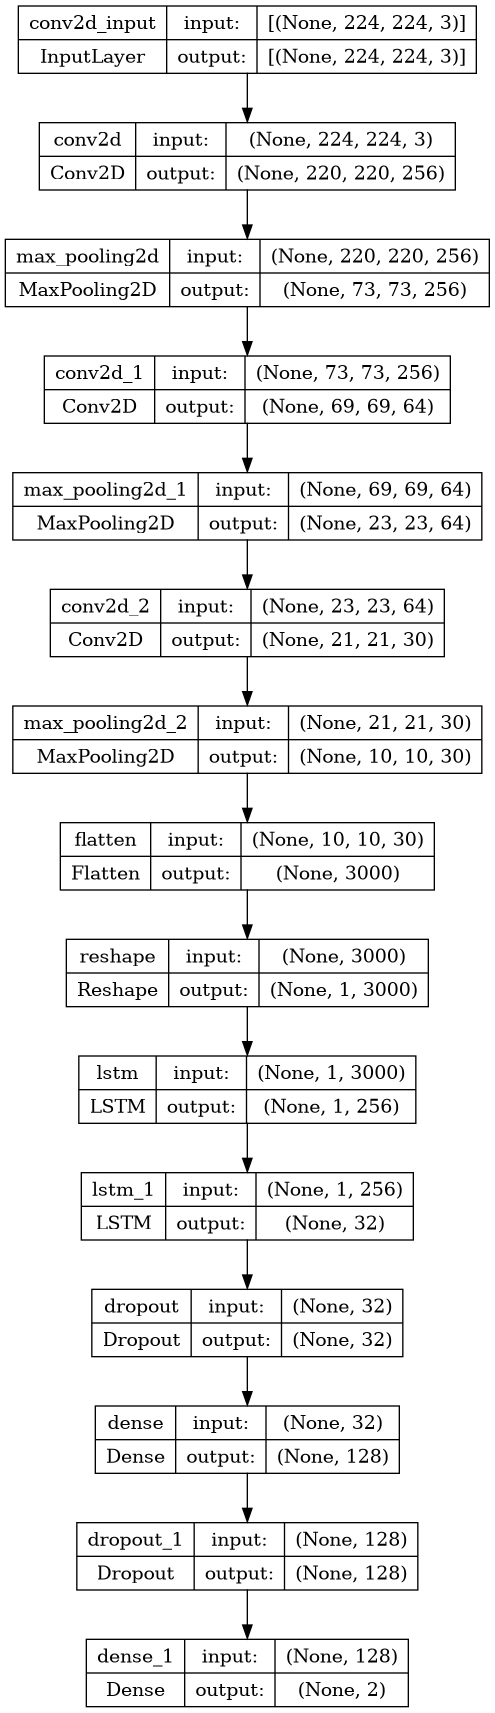

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

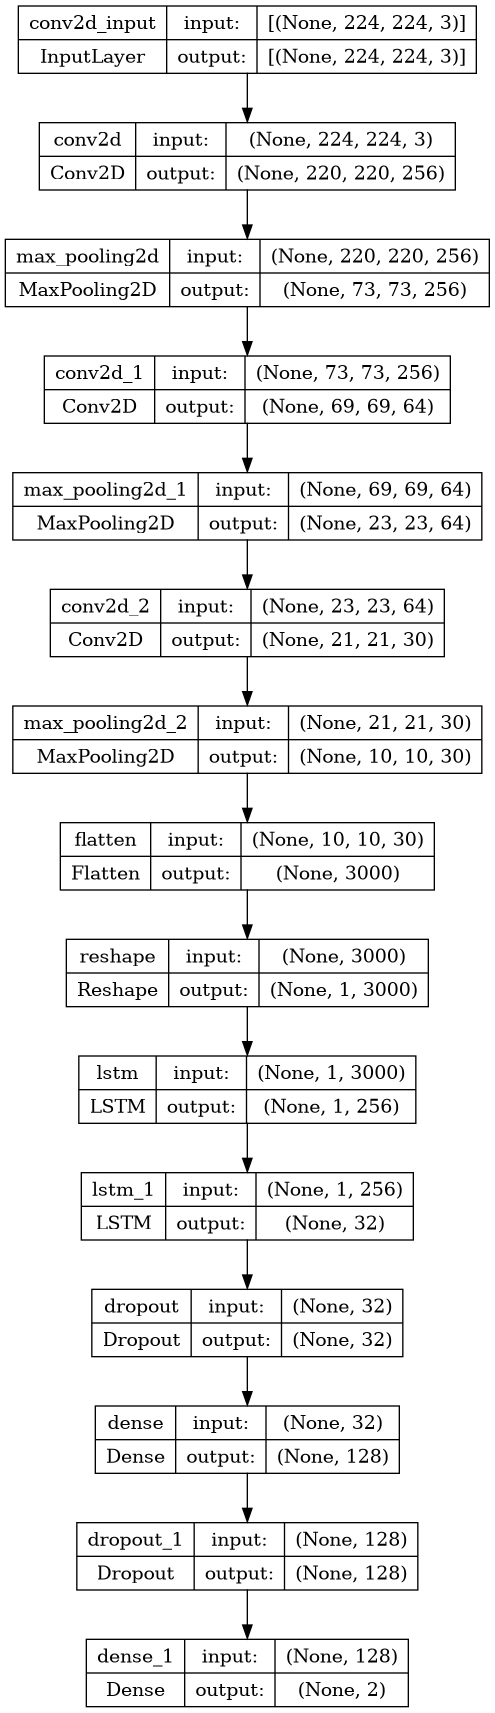

In [12]:
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB')

In [13]:
# Hyperparameters
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

In [14]:
# Stop the training when there is no improvement after 10 epochs trainings.
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [15]:
# Train the model
history =model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,verbose= 1,
          validation_steps=STEP_SIZE_VALID,
          epochs=20, callbacks=early_stop)

Epoch 1/20
22/22 [==============================] - 219s 10s/step - loss: 0.6896 - accuracy: 0.5485 - val_loss: 0.6816 - val_accuracy: 0.5469
Epoch 2/20
22/22 [==============================] - 215s 10s/step - loss: 0.6811 - accuracy: 0.5485 - val_loss: 0.6669 - val_accuracy: 0.5729
Epoch 3/20
22/22 [==============================] - 214s 10s/step - loss: 0.6669 - accuracy: 0.6015 - val_loss: 0.7315 - val_accuracy: 0.5885
Epoch 4/20
22/22 [==============================] - 212s 10s/step - loss: 0.6637 - accuracy: 0.6191 - val_loss: 0.6812 - val_accuracy: 0.5312
Epoch 5/20
22/22 [==============================] - 212s 10s/step - loss: 0.6417 - accuracy: 0.6309 - val_loss: 0.7341 - val_accuracy: 0.5000
Epoch 6/20
22/22 [==============================] - 207s 9s/step - loss: 0.6275 - accuracy: 0.6471 - val_loss: 0.6267 - val_accuracy: 0.6615
Epoch 7/20
22/22 [==============================] - 207s 9s/step - loss: 0.5668 - accuracy: 0.7029 - val_loss: 0.6431 - val_accuracy: 0.6719
Epoch 8/

In [16]:
# Evaluate the model
model.evaluate(valid_generator,steps=STEP_SIZE_VALID)

6/6 [==============================] - 17s 3s/step - loss: 0.5781 - accuracy: 0.8698


[0.5780963897705078, 0.8697916865348816]

In [17]:
# Save the model
model.save("model_CNN")

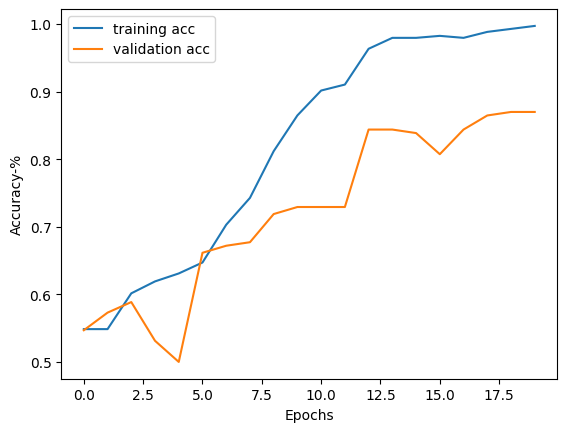

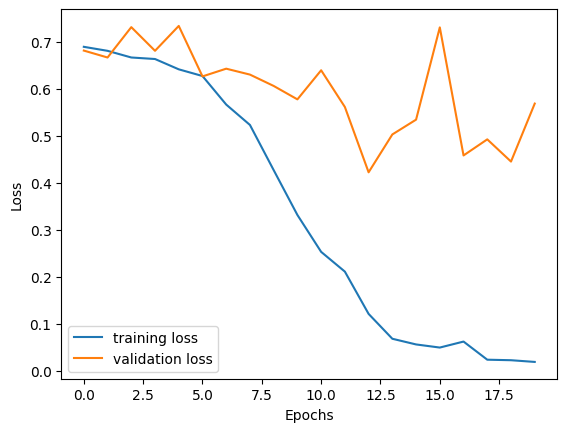

In [18]:
# plot learning curve
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='training acc')
    plt.plot(epochs, val_acc, label='validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-%')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_learning_curve(history)

In [19]:
#info about optimizers
model.optimizer.get_config() 

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Predict Output
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


103/103 [==============================] - 10s 87ms/step


In [21]:
predictions[0:5]

['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal']

In [22]:
current_idx = 0
count_accurate= 0
Actual = []
for i in predictions:
    string = test_generator.filenames[current_idx]
    substr = '/'
    actual = string[:string.find(substr)]
    Actual.append(actual)
    pred = predictions[current_idx]
    if actual == pred: 
        count_accurate += 1
    current_idx +=1
acc = count_accurate/103
print(f"The accuracy on predicted the test images is {round(acc*100,2)}%.")

The accuracy on predicted the test images is 90.29%.


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Actual, predictions))

              precision    recall  f1-score   support

    Abnormal       0.91      0.91      0.91        56
      Normal       0.89      0.89      0.89        47

    accuracy                           0.90       103
   macro avg       0.90      0.90      0.90       103
weighted avg       0.90      0.90      0.90       103



In [24]:
print(confusion_matrix(Actual, predictions))

[[51  5]
 [ 5 42]]


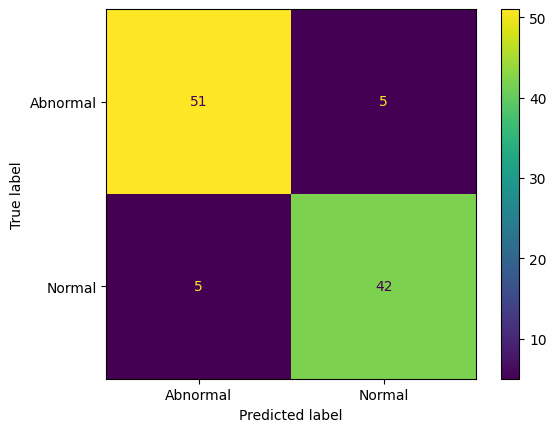

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Actual, predictions)

In [26]:
%who

Activation	 Actual	 AveragePooling1D	 BatchNormalization	 ConfusionMatrixDisplay	 Conv1D	 Conv2D	 Dense	 Dropout	 
EarlyStopping	 Flatten	 GRU	 ImageDataGenerator	 LSTM	 MaxPool2D	 MaxPooling2D	 Reshape	 STEP_SIZE_TEST	 
STEP_SIZE_TRAIN	 STEP_SIZE_VALID	 SeparableConv1D	 Sequential	 SpatialDropout1D	 acc	 actual	 classification_report	 confusion_matrix	 
count_accurate	 current_idx	 early_stop	 history	 i	 keras	 labels	 layers	 losses	 
model	 np	 optimizers	 path	 plot_learning_curve	 plot_model	 plt	 pred	 predicted_class_indices	 
predictions	 regularizers	 string	 substr	 test_datagen	 test_generator	 tf	 train_datagen	 train_generator	 
valid_datagen	 valid_generator	 


In [27]:
acc

0.9029126213592233

In [28]:
# Define the general path
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Assuming 'Actual' and 'predictions' are arrays or lists
conf_matrix = confusion_matrix(Actual, predictions)
# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
tn
# Calculate metrics
accuracy = accuracy_score(Actual, predictions)
precision = precision_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label
recall = recall_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label
specificity = tn / (tn + fp)
f1 = f1_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label

# Print the results
print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"Specificity: {round(specificity, 4)}")
print(f"F1-score: {round(f1, 4)}")
print(f"TN: {round(tn)}")
print(f"FP: {round(fp)}")
print(f"FN: {round(fn)}")
print(f"TP: {round(tp)}")

Accuracy: 0.9029
Precision: 0.9107
Recall: 0.9107
Specificity: 0.9107
F1-score: 0.9107
TN: 51
FP: 5
FN: 5
TP: 42
